In [1]:
#install Seaborn package. Comment after running once.
!pip install seaborn
!pip install statsmodels
!pip install -q datascience                                       
!pip install -q pandas-profiling
print('Installed...')

Installed...


In [2]:
# Import Dependencies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import seaborn as sns                                             
%matplotlib inline
sns.set()
import datetime
from subprocess import check_output
import scipy as sp 
from scipy import stats
from scipy.stats import norm

In [3]:
# 2. Load data
solar_train = pd.DataFrame(pd.read_csv('solar_train.csv',index_col = 0))        
solar_test = pd.DataFrame(pd.read_csv('solar_test.csv',index_col = 0 ))   

In [4]:
# 3. Check the head of the train data (first few rows)
solar_train.head()
# 3. Check the head of the test data (first few rows)
solar_test.head()

UNIXTime                    Data      Time  Temperature  Pressure  \
Id                                                                           
22107  1478720107   11/9/2016 12:00:00 AM  09:35:07           59     30.47   
3780   1474063503   9/16/2016 12:00:00 AM  12:05:03           59     30.48   
13651  1476109221  10/10/2016 12:00:00 AM  04:20:21           47     30.39   
30473  1481475056  12/11/2016 12:00:00 AM  06:50:56           45     30.40   
9084   1477493117  10/26/2016 12:00:00 AM  04:45:17           45     30.40   

       Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
Id                                                                     
22107        44                  312.67   3.37    06:28:00   17:45:00  
3780         83                   38.01   6.75    06:10:00   18:25:00  
13651        78                  213.62   5.62    06:16:00   18:03:00  
30473        98                  176.63   4.50    06:47:00   17:44:00  
9084         34                  175.89   6.75    06:21:00   17:52:00

In [5]:
# 4. Check for missing values
print(solar_train.isnull().sum())
print(solar_test.isnull().any())
print(solar_train.shape)
print(solar_test.shape)

UNIXTime                  0
Data                      0
Time                      0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
Radiation                 0
dtype: int64
UNIXTime                  False
Data                      False
Time                      False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool
(26148, 11)
(6538, 10)


In [6]:
# 5. Summary Statistics
solar_train.describe(include='all')

UNIXTime                   Data      Time   Temperature  \
count   2.614800e+04                  26148     26148  26148.000000   
unique           NaN                    118      7675           NaN   
top              NaN  9/23/2016 12:00:00 AM  06:05:18           NaN   
freq             NaN                    245        18           NaN   
mean    1.478046e+09                    NaN       NaN     51.104865   
std     3.005885e+06                    NaN       NaN      6.213912   
min     1.472724e+09                    NaN       NaN     34.000000   
25%     1.475533e+09                    NaN       NaN     46.000000   
50%     1.478038e+09                    NaN       NaN     50.000000   
75%     1.480478e+09                    NaN       NaN     55.000000   
max     1.483265e+09                    NaN       NaN     71.000000   

            Pressure      Humidity  WindDirection(Degrees)         Speed  \
count   26148.000000  26148.000000            26148.000000  26148.000000   
unique           NaN           NaN                     NaN           NaN   
top              NaN           NaN                     NaN           NaN   
freq             NaN           NaN                     NaN           NaN   
mean       30.422835     75.005239              143.259970      6.248521   
std         0.054724     25.993102               82.988177      3.484166   
min        30.190000     11.000000                0.090000      0.000000   
25%        30.400000     56.000000               81.977500      3.370000   
50%        30.430000     85.000000              147.645000      5.620000   
75%        30.460000     97.000000              179.220000      7.870000   
max        30.560000    103.000000              359.950000     39.370000   

       TimeSunRise TimeSunSet     Radiation  
count        26148      26148  26148.000000  
unique          51         56           NaN  
top       06:11:00   17:42:00           NaN  
freq          1116       2961           NaN  
mean           NaN        NaN    208.044780  
std            NaN        NaN    316.090247  
min            NaN        NaN      1.130000  
25%            NaN        NaN      1.230000  
50%            NaN        NaN      2.710000  
75%            NaN        NaN    358.945000  
max            NaN        NaN   1601.260000

**Observations**
- 
- 
- 
- 

In [7]:
# 5. Summary Statistics
solar_test.describe(include='all')

UNIXTime                   Data      Time  Temperature  \
count   6.538000e+03                   6538      6538  6538.000000   
unique           NaN                    118      3933          NaN   
top              NaN  11/9/2016 12:00:00 AM  16:20:18          NaN   
freq             NaN                     71         9          NaN   
mean    1.478052e+09                    NaN       NaN    51.096819   
std     3.001868e+06                    NaN       NaN     6.150349   
min     1.472725e+09                    NaN       NaN    35.000000   
25%     1.475598e+09                    NaN       NaN    46.000000   
50%     1.477988e+09                    NaN       NaN    50.000000   
75%     1.480591e+09                    NaN       NaN    55.000000   
max     1.483261e+09                    NaN       NaN    71.000000   

           Pressure     Humidity  WindDirection(Degrees)        Speed  \
count   6538.000000  6538.000000             6538.000000  6538.000000   
unique          NaN          NaN                     NaN          NaN   
top             NaN          NaN                     NaN          NaN   
freq            NaN          NaN                     NaN          NaN   
mean      30.423054    75.060569              144.409084     6.225263   
std        0.054474    25.980624               83.880937     3.515794   
min       30.190000     8.000000                0.100000     0.000000   
25%       30.400000    56.000000               82.875000     3.370000   
50%       30.430000    85.000000              148.055000     5.620000   
75%       30.460000    97.000000              179.807500     7.870000   
max       30.560000   103.000000              359.940000    40.500000   

       TimeSunRise TimeSunSet  
count         6538       6538  
unique          51         56  
top       06:11:00   17:42:00  
freq           283        721  
mean           NaN        NaN  
std            NaN        NaN  
min            NaN        NaN  
25%            NaN        NaN  
50%            NaN        NaN  
75%            NaN        NaN  
max            NaN        NaN

In [8]:
# 4. Check for info
solar_train.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26148 entries, 4152 to 23654
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                26148 non-null  int64  
 1   Data                    26148 non-null  object 
 2   Time                    26148 non-null  object 
 3   Temperature             26148 non-null  int64  
 4   Pressure                26148 non-null  float64
 5   Humidity                26148 non-null  int64  
 6   WindDirection(Degrees)  26148 non-null  float64
 7   Speed                   26148 non-null  float64
 8   TimeSunRise             26148 non-null  object 
 9   TimeSunSet              26148 non-null  object 
 10  Radiation               26148 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.4 MB


**Observations**
- time columns are in object
- UNIX time  datetime convert
- Wind Direction have to be checked out for unique
- Wind Speed 

In [9]:
solar_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6538 entries, 22107 to 20894
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                6538 non-null   int64  
 1   Data                    6538 non-null   object 
 2   Time                    6538 non-null   object 
 3   Temperature             6538 non-null   int64  
 4   Pressure                6538 non-null   float64
 5   Humidity                6538 non-null   int64  
 6   WindDirection(Degrees)  6538 non-null   float64
 7   Speed                   6538 non-null   float64
 8   TimeSunRise             6538 non-null   object 
 9   TimeSunSet              6538 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 561.9+ KB


In [10]:

solar_train['Date'] = pd.to_datetime(solar_train['Data']).dt.date.astype(str)
solar_train['TimeSunRise'] = solar_train['Date'] + ' ' + solar_train['TimeSunRise']
solar_train['TimeSunSet'] = solar_train['Date'] + ' ' + solar_train['TimeSunSet']
solar_train['Date'] = solar_train['Date'] + ' ' + solar_train['Time']

solar_train = solar_train.sort_values('Date').reset_index(drop=True)
solar_train.set_index('Date', inplace=True)
solar_train.drop(['Data', 'Time', 'UNIXTime'], axis=1, inplace=True)
solar_train.index = pd.to_datetime(solar_train.index)
solar_train.head()

Temperature  Pressure  Humidity  WindDirection(Degrees)  \
Date                                                                           
2016-09-01 00:00:08           51     30.43       103                   77.27   
2016-09-01 00:05:10           51     30.43       103                  153.44   
2016-09-01 00:25:05           51     30.43       103                  144.12   
2016-09-01 00:30:09           51     30.43       103                   67.42   
2016-09-01 00:45:04           51     30.43       103                   67.85   

                     Speed          TimeSunRise           TimeSunSet  \
Date                                                                   
2016-09-01 00:00:08  11.25  2016-09-01 06:07:00  2016-09-01 18:38:00   
2016-09-01 00:05:10   9.00  2016-09-01 06:07:00  2016-09-01 18:38:00   
2016-09-01 00:25:05  18.00  2016-09-01 06:07:00  2016-09-01 18:38:00   
2016-09-01 00:30:09  11.25  2016-09-01 06:07:00  2016-09-01 18:38:00   
2016-09-01 00:45:04   4.50  2016-09-01 06:07:00  2016-09-01 18:38:00   

                     Radiation  
Date                            
2016-09-01 00:00:08       2.58  
2016-09-01 00:05:10       2.83  
2016-09-01 00:25:05       2.21  
2016-09-01 00:30:09       2.25  
2016-09-01 00:45:04       2.15

In [11]:
solar_test['Date'] = pd.to_datetime(solar_test['Data']).dt.date.astype(str)
solar_test['TimeSunRise'] = solar_test['Date'] + ' ' + solar_test['TimeSunRise']
solar_test['TimeSunSet'] = solar_test['Date'] + ' ' + solar_test['TimeSunSet']
solar_test['Date'] = solar_test['Date'] + ' ' + solar_test['Time']

solar_test1 = solar_test.sort_values('Date').reset_index(drop=True)
solar_test1.set_index('Date', inplace=True)
solar_test1.drop(['Data', 'Time', 'UNIXTime'], axis=1, inplace=True)
solar_test1.index = pd.to_datetime(solar_test.index)
solar_test1.head()

Temperature  Pressure  Humidity  \
Id                                                               
1970-01-01 00:00:00.000022107           51     30.43       103   
1970-01-01 00:00:00.000003780           51     30.42       103   
1970-01-01 00:00:00.000013651           51     30.42       103   
1970-01-01 00:00:00.000030473           51     30.42       103   
1970-01-01 00:00:00.000009084           51     30.41       103   

                               WindDirection(Degrees)  Speed  \
Id                                                             
1970-01-01 00:00:00.000022107                  142.04   7.87   
1970-01-01 00:00:00.000003780                  158.06   4.50   
1970-01-01 00:00:00.000013651                  112.42   4.50   
1970-01-01 00:00:00.000030473                   66.06   5.62   
1970-01-01 00:00:00.000009084                  127.54  12.37   

                                       TimeSunRise           TimeSunSet  
Id                                                                       
1970-01-01 00:00:00.000022107  2016-09-01 06:07:00  2016-09-01 18:38:00  
1970-01-01 00:00:00.000003780  2016-09-01 06:07:00  2016-09-01 18:38:00  
1970-01-01 00:00:00.000013651  2016-09-01 06:07:00  2016-09-01 18:38:00  
1970-01-01 00:00:00.000030473  2016-09-01 06:07:00  2016-09-01 18:38:00  
1970-01-01 00:00:00.000009084  2016-09-01 06:07:00  2016-09-01 18:38:00

In [12]:
solar_train.rename({
    'Radiation': 'Radiation(W/m2)', 'Temperature': 'Temperature(F)', 'Pressure': 'Pressure(mm Hg)', 'Humidity': 'Humidity(%)',
    'Speed': 'Speed(mph)'
}, axis=1, inplace=True)
solar_test1.rename({
     'Temperature': 'Temperature(F)', 'Pressure': 'Pressure(mm Hg)', 'Humidity': 'Humidity(%)',
    'Speed': 'Speed(mph)'
}, axis=1, inplace=True)
solar_train.head()

Temperature(F)  Pressure(mm Hg)  Humidity(%)  \
Date                                                                
2016-09-01 00:00:08              51            30.43          103   
2016-09-01 00:05:10              51            30.43          103   
2016-09-01 00:25:05              51            30.43          103   
2016-09-01 00:30:09              51            30.43          103   
2016-09-01 00:45:04              51            30.43          103   

                     WindDirection(Degrees)  Speed(mph)          TimeSunRise  \
Date                                                                           
2016-09-01 00:00:08                   77.27       11.25  2016-09-01 06:07:00   
2016-09-01 00:05:10                  153.44        9.00  2016-09-01 06:07:00   
2016-09-01 00:25:05                  144.12       18.00  2016-09-01 06:07:00   
2016-09-01 00:30:09                   67.42       11.25  2016-09-01 06:07:00   
2016-09-01 00:45:04                   67.85        4.50  2016-09-01 06:07:00   

                              TimeSunSet  Radiation(W/m2)  
Date                                                       
2016-09-01 00:00:08  2016-09-01 18:38:00             2.58  
2016-09-01 00:05:10  2016-09-01 18:38:00             2.83  
2016-09-01 00:25:05  2016-09-01 18:38:00             2.21  
2016-09-01 00:30:09  2016-09-01 18:38:00             2.25  
2016-09-01 00:45:04  2016-09-01 18:38:00             2.15

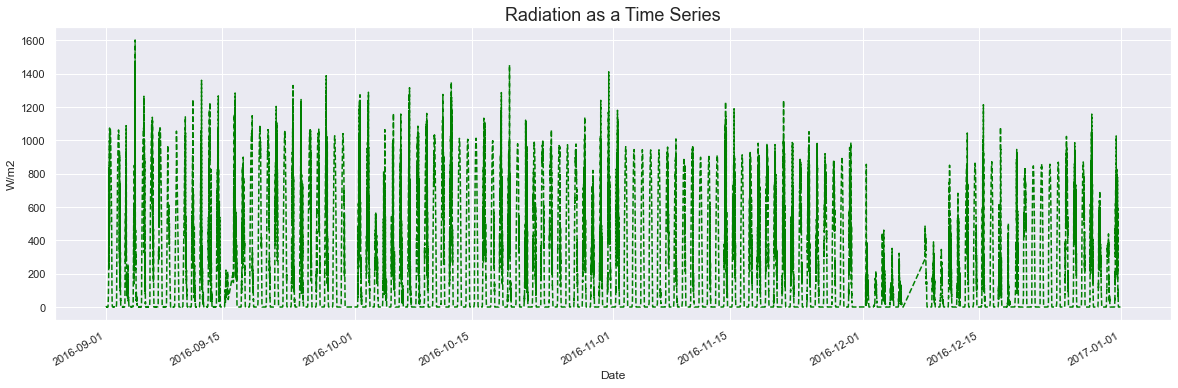

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
solar_train['Radiation(W/m2)'].plot(ax=ax, style=['--'], color='green')
ax.set_title('Radiation as a Time Series', fontsize=18)
ax.set_ylabel('W/m2')
plt.show()

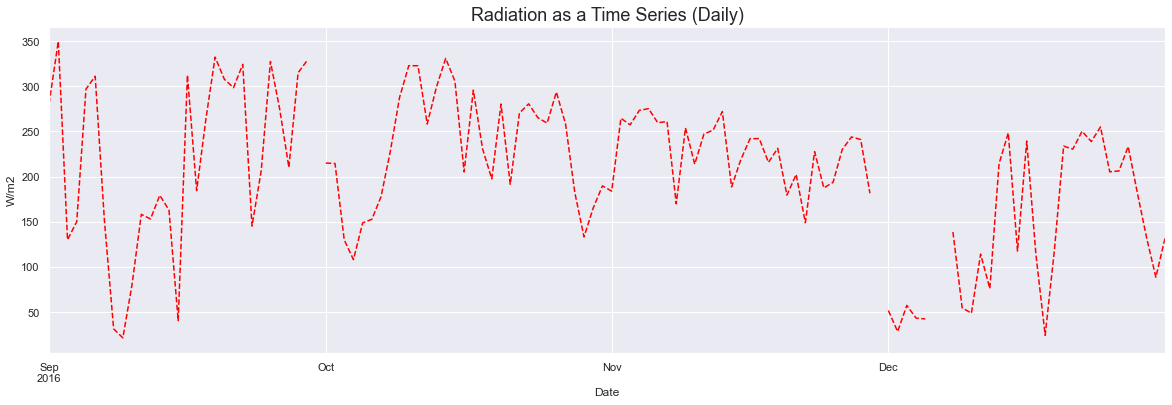

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
solar_train.groupby(pd.Grouper(freq="D"))['Radiation(W/m2)'].mean().plot(ax=ax, style=['--'], color='red')
ax.set_title('Radiation as a Time Series (Daily)', fontsize=18)
ax.set_ylabel('W/m2')
plt.show()


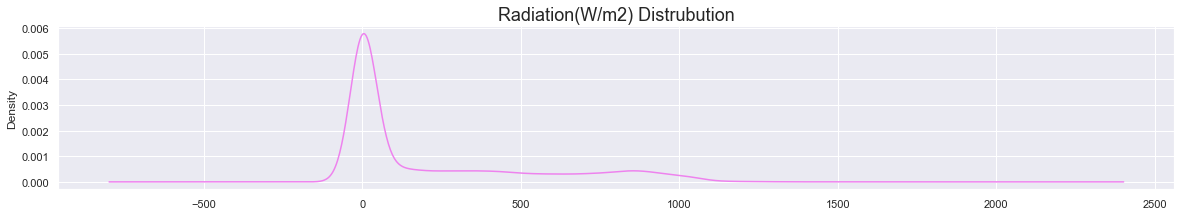

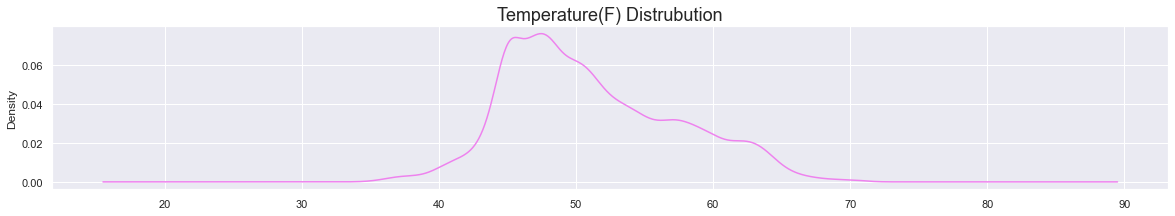

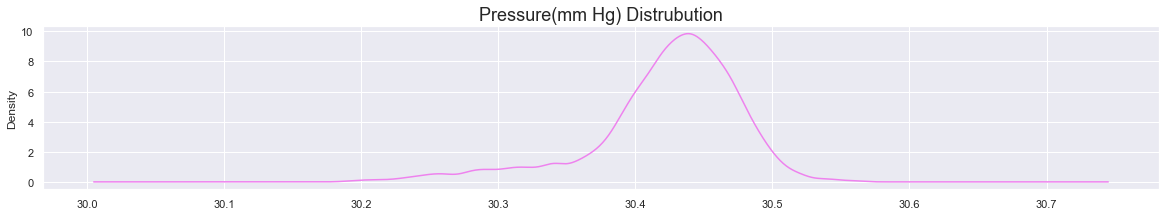

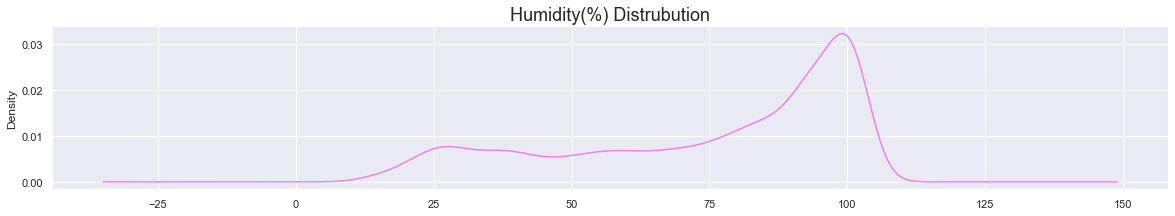

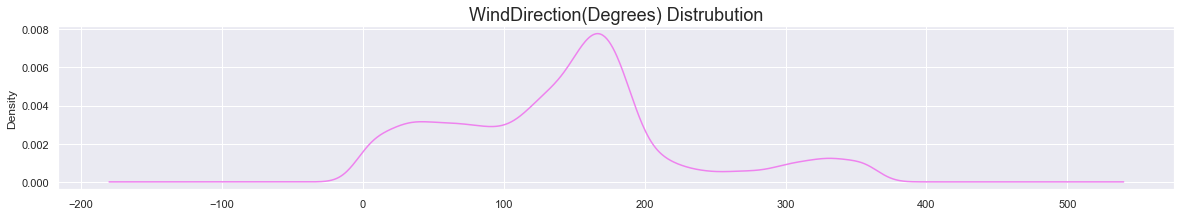

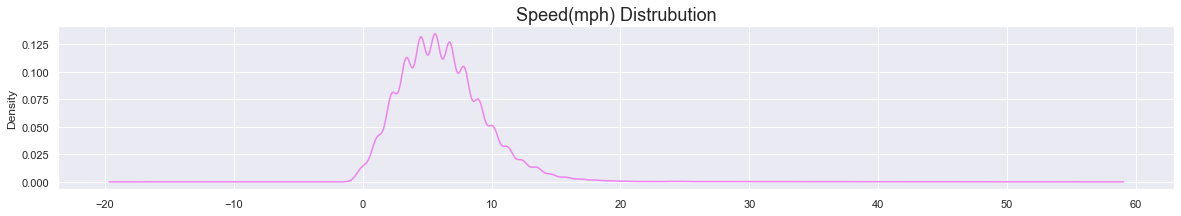

In [15]:
for col in ['Radiation(W/m2)','Temperature(F)', 'Pressure(mm Hg)', 'Humidity(%)', 'WindDirection(Degrees)', 'Speed(mph)']:
    fig, ax = plt.subplots(figsize=(20, 3))
    solar_train[col].plot.density(ax=ax, color='violet')
    ax.set_title(f'{col} Distrubution', fontsize=18)
    plt.show()

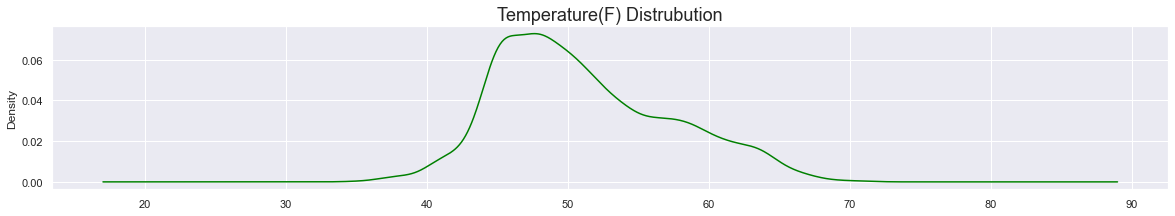

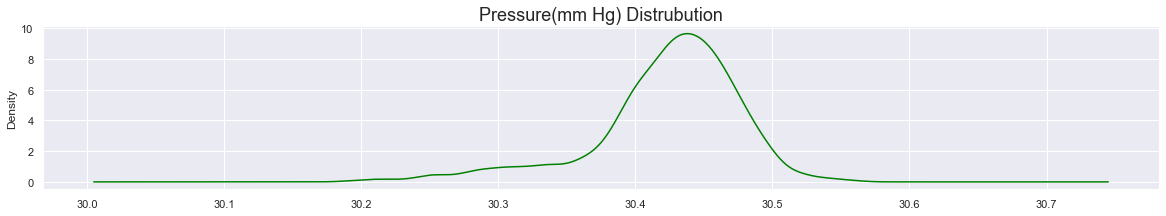

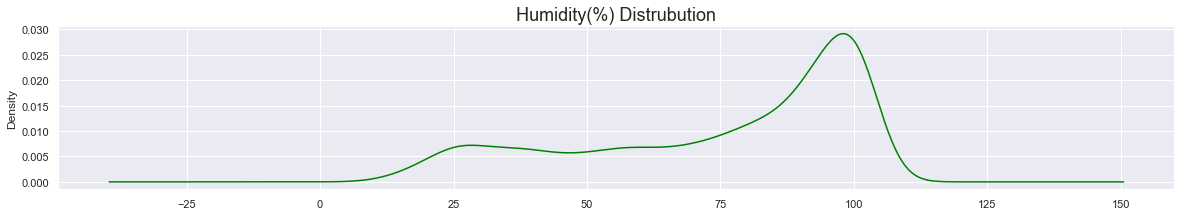

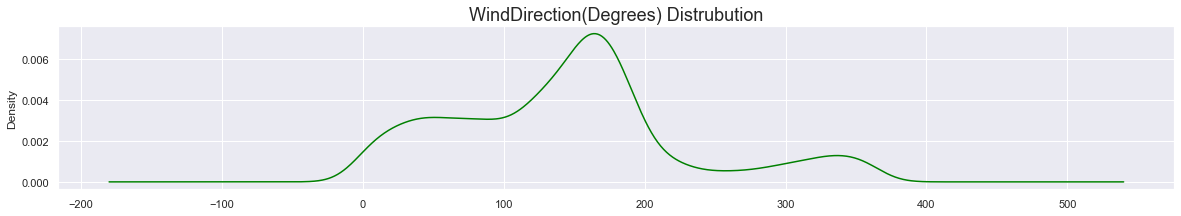

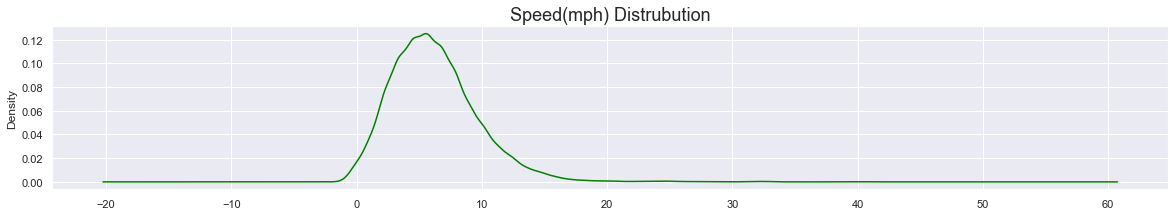

In [16]:
for col in ['Temperature(F)', 'Pressure(mm Hg)', 'Humidity(%)', 'WindDirection(Degrees)', 'Speed(mph)']:
    fig, ax = plt.subplots(figsize=(20, 3))
    solar_test1[col].plot.density(ax=ax, color='green')
    ax.set_title(f'{col} Distrubution', fontsize=18)
    plt.show()

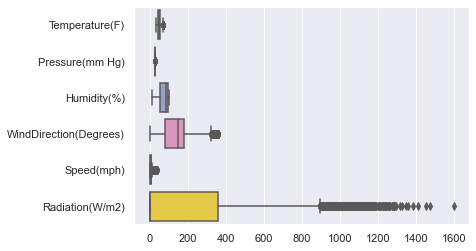

In [17]:
def lr():
    import seaborn as sns
    sns.boxplot(data=solar_train, orient="h", palette="Set2")
    return None 
lr()

In [18]:

#outlier removal, upto Z score=3std
import pandas as pd
def lr(solar_train):
    
    Q1 = solar_train.quantile(0.10)
    Q3 = solar_train.quantile(0.90)
    Q_diff = Q3 - Q1
    solar_out = solar_train[~((solar_train < (Q1 - Q_diff))|(solar_train > (Q3 + Q_diff))).any(axis=1)]
    print(solar_train[((solar_train < (Q1 - Q_diff))|(solar_train > (Q3 + Q_diff))).any(axis=1)])
    return solar_out
lr(solar_train)
solar_train=lr(solar_train)
print (solar_train)


                     Temperature(F)  Pressure(mm Hg)  Humidity(%)  \
Date                                                                
2016-09-01 00:25:05              51            30.43          103   
2016-09-04 12:15:04              61            30.47           93   
2016-09-13 12:20:05              65            30.45           73   
2016-09-14 14:25:09              59            30.41           76   
2016-09-16 08:15:02              52            30.46           99   
...                             ...              ...          ...   
2016-12-27 05:30:50              46            30.41           30   
2016-12-27 05:35:49              46            30.41           30   
2016-12-27 12:35:49              59            30.42           19   
2016-12-30 18:15:02              46            30.33           83   
2016-12-31 14:00:01              53            30.29           79   

                     WindDirection(Degrees)  Speed(mph)          TimeSunRise  \
Date                  

<ipython-input-18-2d2c25460660>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  solar_out = solar_train[~((solar_train < (Q1 - Q_diff))|(solar_train > (Q3 + Q_diff))).any(axis=1)]
<ipython-input-18-2d2c25460660>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  solar_out = solar_train[~((solar_train < (Q1 - Q_diff))|(solar_train > (Q3 + Q_diff))).any(axis=1)]
<ipython-input-18-2d2c25460660>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(solar_train[((solar_train < (

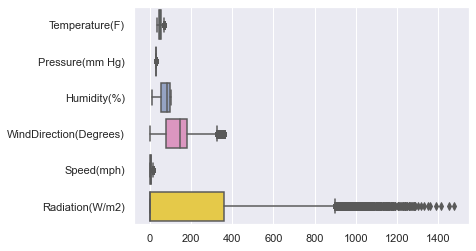

In [19]:
def lr():
    import seaborn as sns
    sns.boxplot(data=solar_train, orient="h", palette="Set2")
    return None 
lr()

<AxesSubplot:>

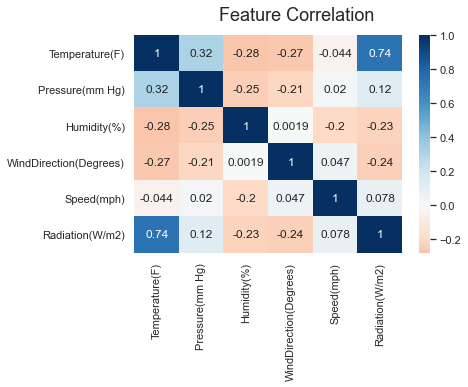

In [20]:
fig = plt.figure()
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(solar_train.corr(), annot=True, cmap='RdBu', center=0)

<AxesSubplot:>

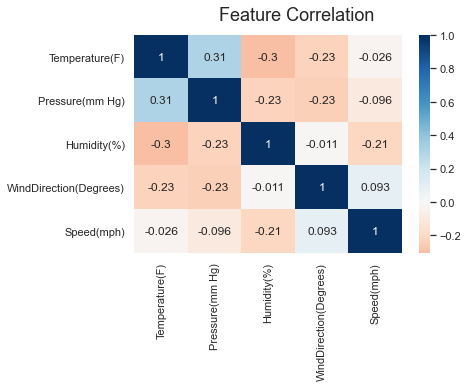

In [21]:
fig = plt.figure()
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(solar_test1.corr(), annot=True, cmap='RdBu', center=0)

In [22]:
print(solar_train.isnull().sum())

Temperature(F)            0
Pressure(mm Hg)           0
Humidity(%)               0
WindDirection(Degrees)    0
Speed(mph)                0
TimeSunRise               0
TimeSunSet                0
Radiation(W/m2)           0
dtype: int64


<AxesSubplot:ylabel='Date'>

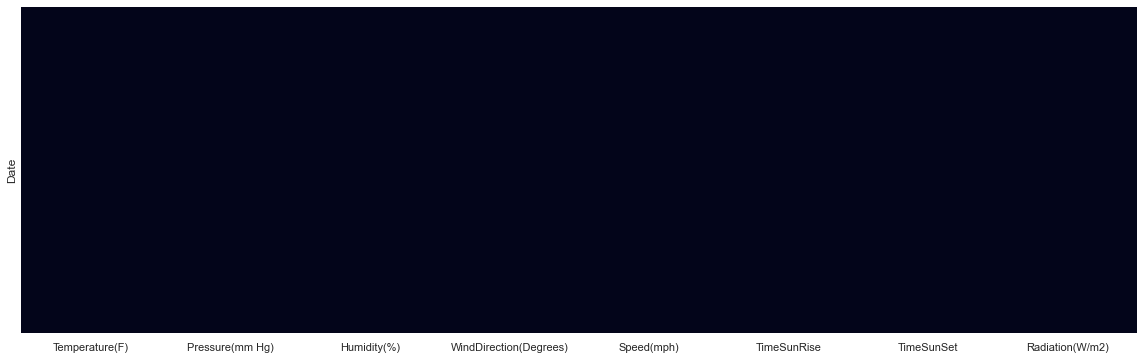

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(solar_train.isnull(), cbar=False, yticklabels=False)

**Observations**
- No Null values
- 
- 
- 

In [24]:
def drop_duplicate_data(solar_train):
  before_shape = solar_train.shape
  print('Data Shape [Before]:', before_shape)

  solar_train.drop_duplicates(inplace = True)

  after_shape = solar_train.shape
  print('Data Shape [After]:', after_shape)

  drop_nums = before_shape[0] - after_shape[0]
  drop_percent = np.round(drop_nums / before_shape[0], decimals = 3) * 100

  print('Drop Ratio:', drop_percent, '%')
   

In [25]:
drop_duplicate_data(solar_train)

Data Shape [Before]: (25878, 8)
Data Shape [After]: (25856, 8)
Drop Ratio: 0.1 %


**Observations**
- 22 duplicates

In [26]:
#6. to understand skew in all variables and see if y variable has a normal distribution
#Which feature in the dataset is normally distributed?
print(solar_train.skew())
print(solar_test1.skew())

Temperature(F)            0.526193
Pressure(mm Hg)          -1.088818
Humidity(%)              -0.781742
WindDirection(Degrees)    0.575691
Speed(mph)                0.537688
Radiation(W/m2)           1.354896
dtype: float64
Temperature(F)            0.540498
Pressure(mm Hg)          -1.193679
Humidity(%)              -0.782914
WindDirection(Degrees)    0.590359
Speed(mph)                1.354835
dtype: float64


**Observations**
- skewed in target variable, needs to be normalized
- other option is to use tree models

In [27]:
# importing sweetviz
import sweetviz as sv

In [28]:
#analyzing the dataset
solar_train_report = sv.analyze(solar_train)
#display the report
solar_train_report.show_html('solar_train.html')

                                             |                                             | [  0%]   00:00 ->…

Report solar_train.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


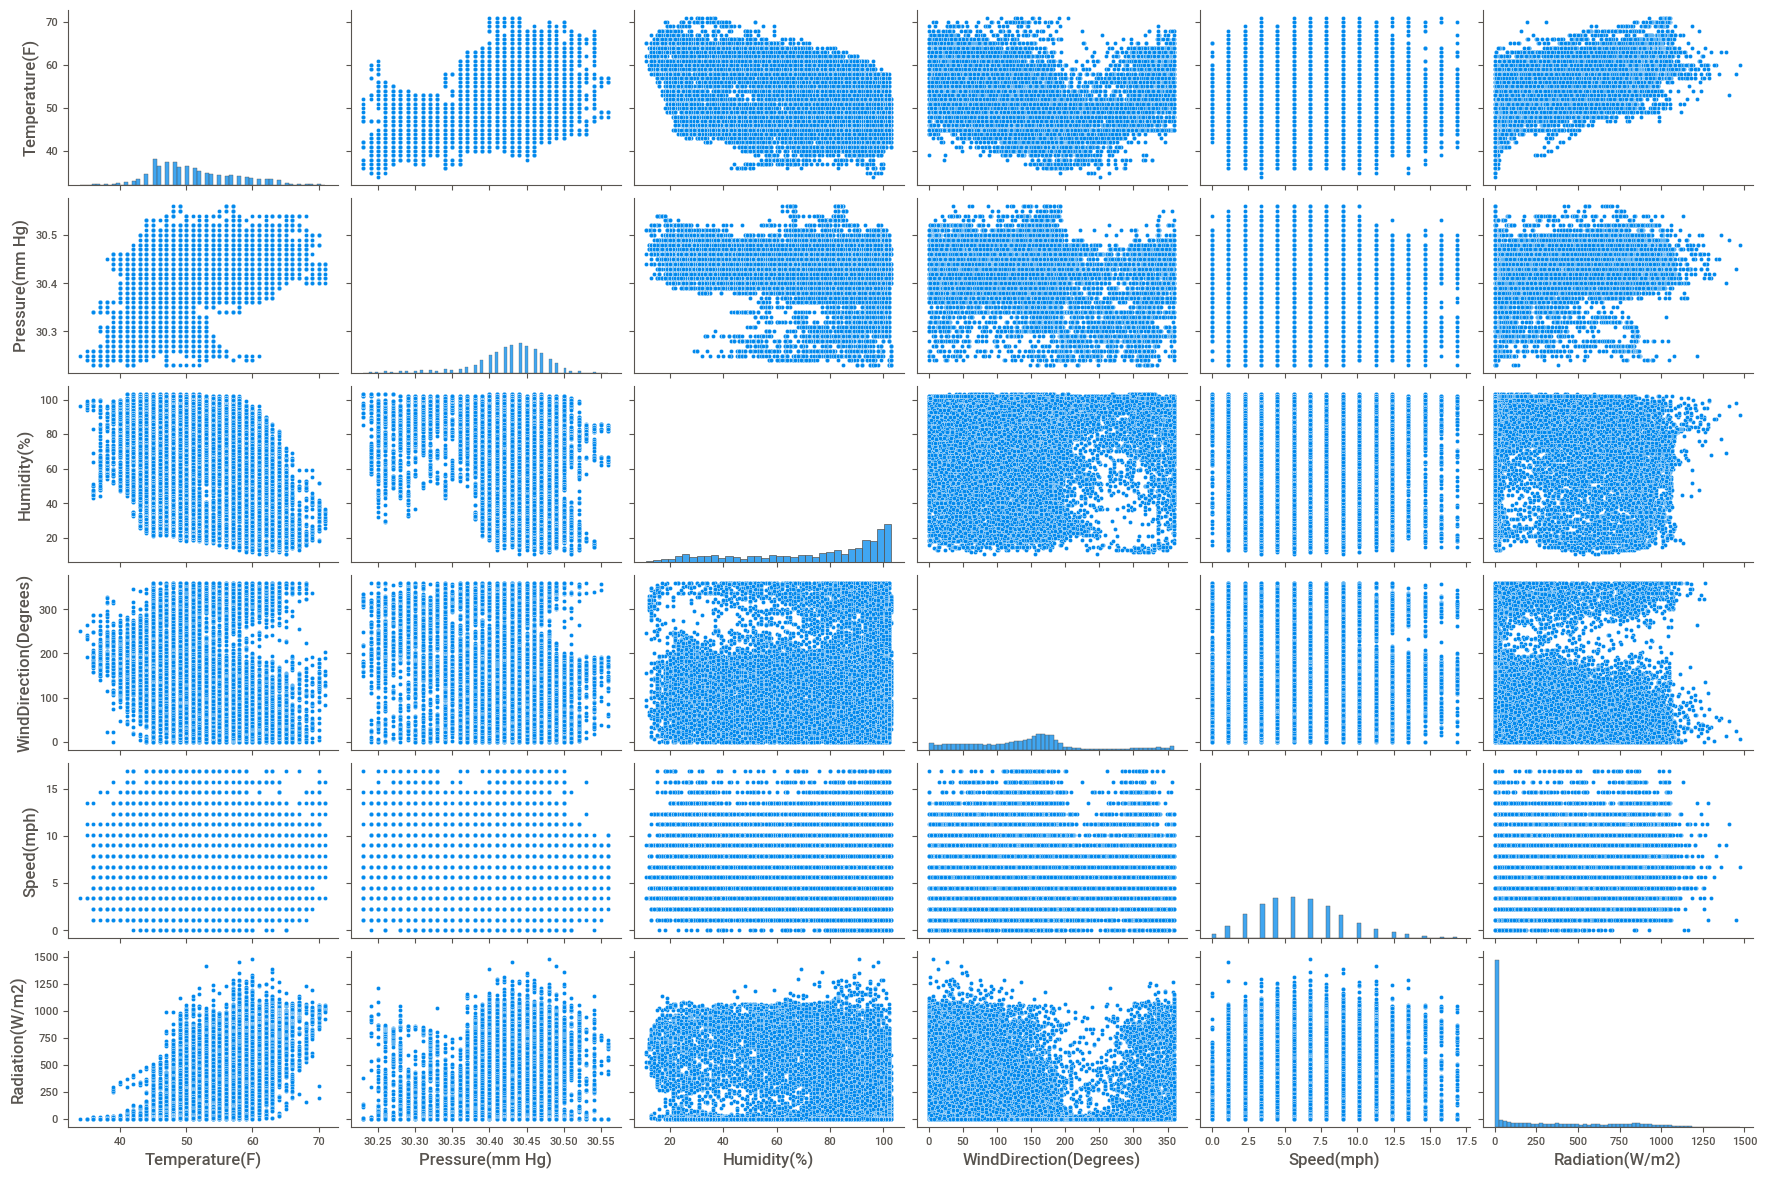

In [29]:
#13. Check for Linearity
sns.pairplot(data=solar_train, height=2,aspect=1.5)

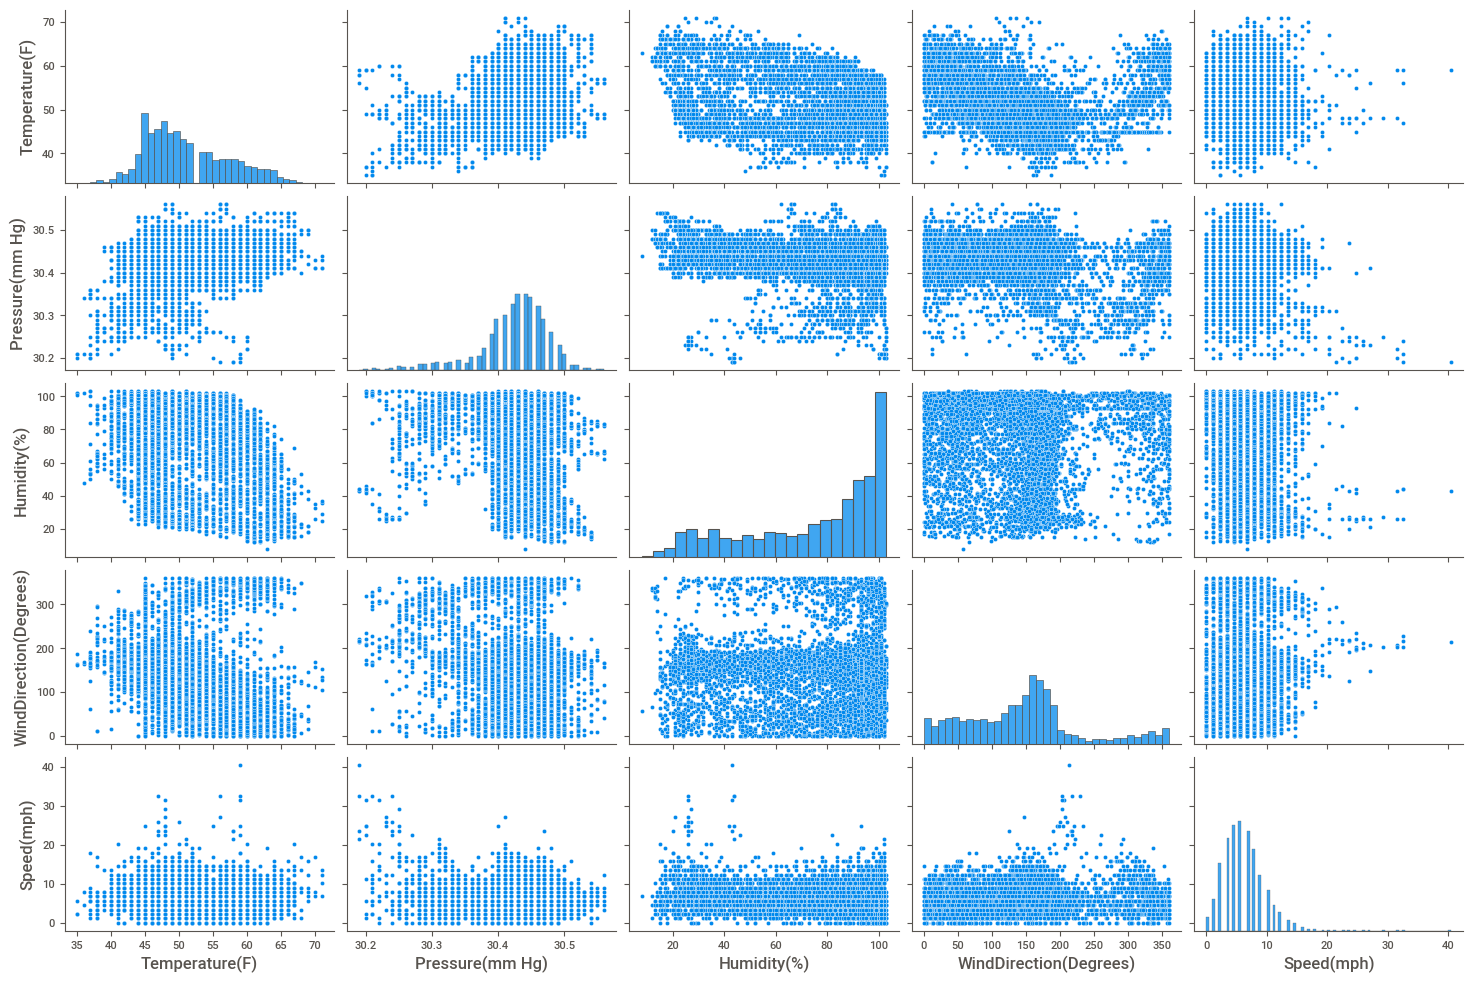

In [30]:
#13. Check for Linearity
sns.pairplot(data=solar_test1, height=2,aspect=1.5)

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anacond

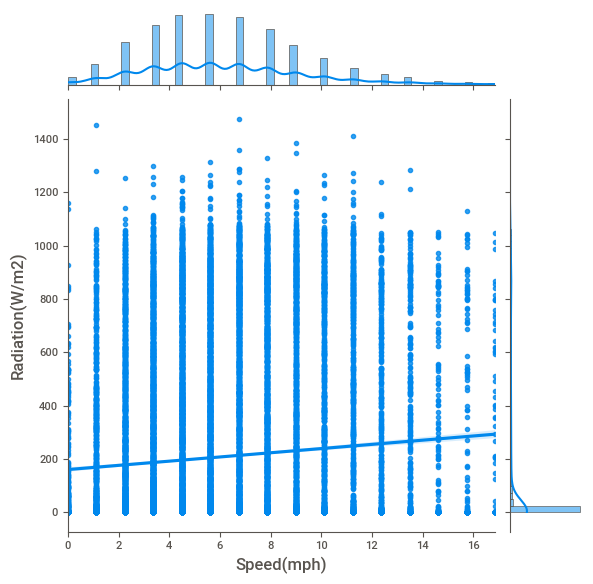

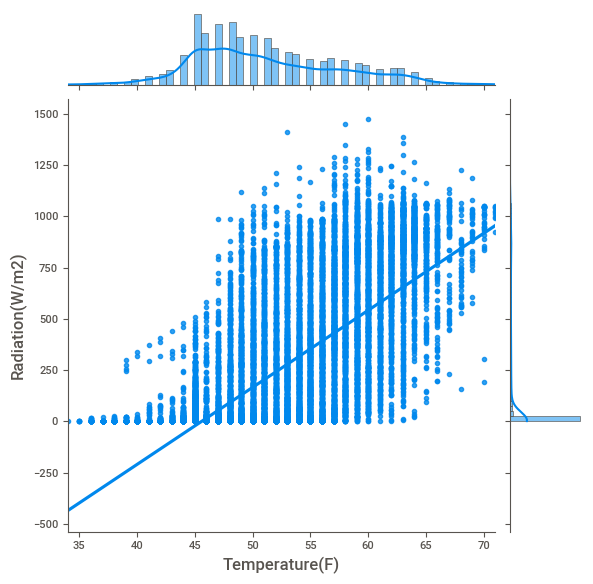

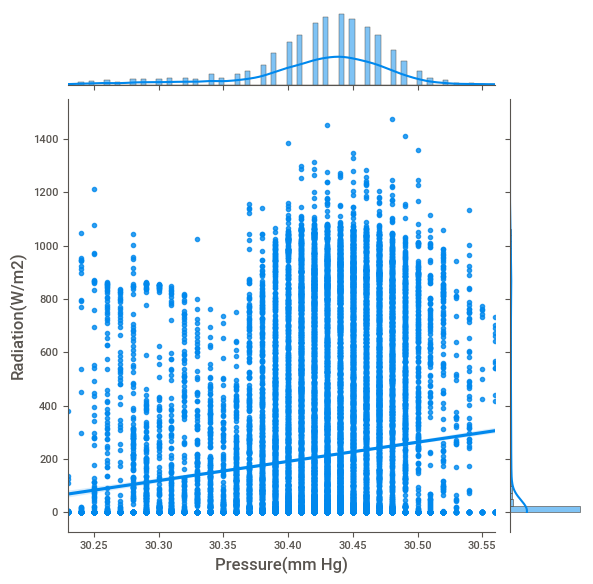

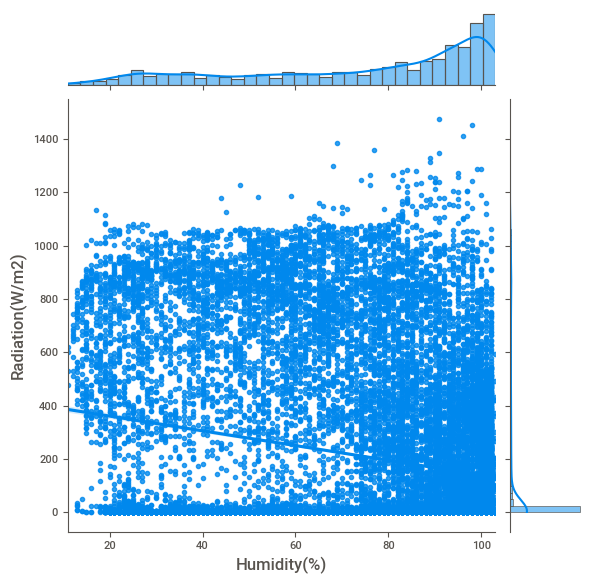

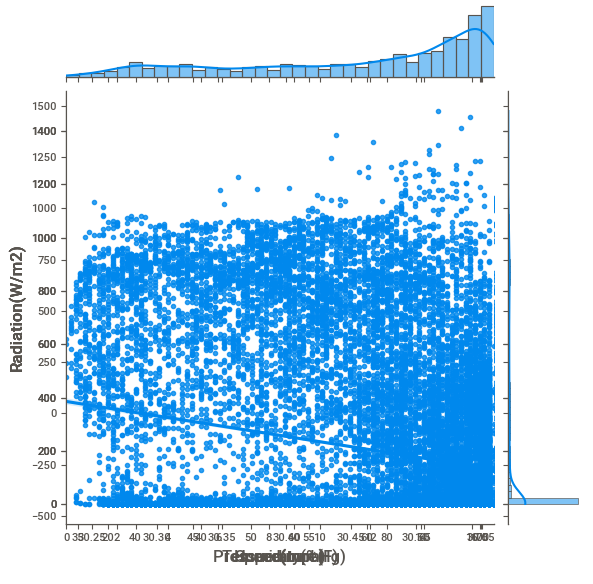

In [31]:
JG1 = sns.jointplot("Speed(mph)","Radiation(W/m2)", data=solar_train, kind='reg')
JG2 = sns.jointplot("Temperature(F)", "Radiation(W/m2)", data=solar_train, kind='reg')
JG3 = sns.jointplot("Pressure(mm Hg)", "Radiation(W/m2)", data=solar_train, kind='reg')
JG4 = sns.jointplot("Humidity(%)", "Radiation(W/m2)", data=solar_train, kind='reg')
#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3,JG4]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

In [32]:
def total_seconds(series):
    return series.hour*60*60 + series.minute*60 + series.second

In [33]:
solar_train['MonthOfYear'] = solar_train.index.strftime('%m').astype(int)
solar_train['DayOfYear'] = solar_train.index.strftime('%j').astype(int)
solar_train['WeekOfYear'] = solar_train.index.strftime('%U').astype(int)
solar_train['TimeOfDay(h)'] = solar_train.index.hour
solar_train['TimeOfDay(m)'] = solar_train.index.hour*60 + solar_train.index.minute
solar_train['TimeOfDay(s)'] = total_seconds(solar_train.index)
solar_train['TimeSunRise'] = pd.to_datetime(solar_train['TimeSunRise'])
solar_train['TimeSunSet'] = pd.to_datetime(solar_train['TimeSunSet'])
solar_train['DayLength(s)'] = total_seconds(solar_train['TimeSunSet'].dt) - total_seconds(solar_train['TimeSunRise'].dt)
solar_train['TimeAfterSunRise(s)'] = total_seconds(solar_train.index) - total_seconds(solar_train['TimeSunRise'].dt)
solar_train['TimeBeforeSunSet(s)'] = total_seconds(solar_train['TimeSunSet'].dt) - total_seconds(solar_train.index)
solar_train['RelativeTOD'] = solar_train['TimeAfterSunRise(s)'] / solar_train['DayLength(s)']
solar_train.drop(['TimeSunRise','TimeSunSet'], inplace=True, axis=1)
solar_train.head()

Temperature(F)  Pressure(mm Hg)  Humidity(%)  \
Date                                                                
2016-09-01 00:00:08              51            30.43          103   
2016-09-01 00:05:10              51            30.43          103   
2016-09-01 00:30:09              51            30.43          103   
2016-09-01 00:45:04              51            30.43          103   
2016-09-01 00:50:06              51            30.43          103   

                     WindDirection(Degrees)  Speed(mph)  Radiation(W/m2)  \
Date                                                                       
2016-09-01 00:00:08                   77.27       11.25             2.58   
2016-09-01 00:05:10                  153.44        9.00             2.83   
2016-09-01 00:30:09                   67.42       11.25             2.25   
2016-09-01 00:45:04                   67.85        4.50             2.15   
2016-09-01 00:50:06                  156.58        1.12             2.07   

                     MonthOfYear  DayOfYear  WeekOfYear  TimeOfDay(h)  \
Date                                                                    
2016-09-01 00:00:08            9        245          35             0   
2016-09-01 00:05:10            9        245          35             0   
2016-09-01 00:30:09            9        245          35             0   
2016-09-01 00:45:04            9        245          35             0   
2016-09-01 00:50:06            9        245          35             0   

                     TimeOfDay(m)  TimeOfDay(s)  DayLength(s)  \
Date                                                            
2016-09-01 00:00:08             0             8         45060   
2016-09-01 00:05:10             5           310         45060   
2016-09-01 00:30:09            30          1809         45060   
2016-09-01 00:45:04            45          2704         45060   
2016-09-01 00:50:06            50          3006         45060   

                     TimeAfterSunRise(s)  TimeBeforeSunSet(s)  RelativeTOD  
Date                                                                        
2016-09-01 00:00:08               -22012                67072    -0.488504  
2016-09-01 00:05:10               -21710                66770    -0.481802  
2016-09-01 00:30:09               -20211                65271    -0.448535  
2016-09-01 00:45:04               -19316                64376    -0.428673  
2016-09-01 00:50:06               -19014                64074    -0.421971

In [34]:
solar_test1['MonthOfYear'] = solar_test1.index.strftime('%m').astype(int)
solar_test1['DayOfYear'] = solar_test1.index.strftime('%j').astype(int)
solar_test1['WeekOfYear'] = solar_test1.index.strftime('%U').astype(int)
solar_test1['TimeOfDay(h)'] = solar_test1.index.hour
solar_test1['TimeOfDay(m)'] = solar_test1.index.hour*60 + solar_test1.index.minute
solar_test1['TimeOfDay(s)'] = total_seconds(solar_test1.index)
solar_test1['TimeSunRise'] = pd.to_datetime(solar_test1['TimeSunRise'])
solar_test1['TimeSunSet'] = pd.to_datetime(solar_test1['TimeSunSet'])
solar_test1['DayLength(s)'] = total_seconds(solar_test1['TimeSunSet'].dt) - total_seconds(solar_test1['TimeSunRise'].dt)
solar_test1['TimeAfterSunRise(s)'] = total_seconds(solar_test1.index) - total_seconds(solar_test1['TimeSunRise'].dt)
solar_test1['TimeBeforeSunSet(s)'] = total_seconds(solar_test1['TimeSunSet'].dt) - total_seconds(solar_test1.index)
solar_test1['RelativeTOD'] = solar_test1['TimeAfterSunRise(s)'] / solar_test1['DayLength(s)']
solar_test1.drop(['TimeSunRise','TimeSunSet'], inplace=True, axis=1)
solar_test1.head()

Temperature(F)  Pressure(mm Hg)  Humidity(%)  \
Id                                                                            
1970-01-01 00:00:00.000022107              51            30.43          103   
1970-01-01 00:00:00.000003780              51            30.42          103   
1970-01-01 00:00:00.000013651              51            30.42          103   
1970-01-01 00:00:00.000030473              51            30.42          103   
1970-01-01 00:00:00.000009084              51            30.41          103   

                               WindDirection(Degrees)  Speed(mph)  \
Id                                                                  
1970-01-01 00:00:00.000022107                  142.04        7.87   
1970-01-01 00:00:00.000003780                  158.06        4.50   
1970-01-01 00:00:00.000013651                  112.42        4.50   
1970-01-01 00:00:00.000030473                   66.06        5.62   
1970-01-01 00:00:00.000009084                  127.54       12.37   

                               MonthOfYear  DayOfYear  WeekOfYear  \
Id                                                                  
1970-01-01 00:00:00.000022107            1          1           0   
1970-01-01 00:00:00.000003780            1          1           0   
1970-01-01 00:00:00.000013651            1          1           0   
1970-01-01 00:00:00.000030473            1          1           0   
1970-01-01 00:00:00.000009084            1          1           0   

                               TimeOfDay(h)  TimeOfDay(m)  TimeOfDay(s)  \
Id                                                                        
1970-01-01 00:00:00.000022107             0             0             0   
1970-01-01 00:00:00.000003780             0             0             0   
1970-01-01 00:00:00.000013651             0             0             0   
1970-01-01 00:00:00.000030473             0             0             0   
1970-01-01 00:00:00.000009084             0             0             0   

                               DayLength(s)  TimeAfterSunRise(s)  \
Id                                                                 
1970-01-01 00:00:00.000022107         45060               -22020   
1970-01-01 00:00:00.000003780         45060               -22020   
1970-01-01 00:00:00.000013651         45060               -22020   
1970-01-01 00:00:00.000030473         45060               -22020   
1970-01-01 00:00:00.000009084         45060               -22020   

                               TimeBeforeSunSet(s)  RelativeTOD  
Id                                                               
1970-01-01 00:00:00.000022107                67080    -0.488682  
1970-01-01 00:00:00.000003780                67080    -0.488682  
1970-01-01 00:00:00.000013651                67080    -0.488682  
1970-01-01 00:00:00.000030473                67080    -0.488682  
1970-01-01 00:00:00.000009084                67080    -0.488682

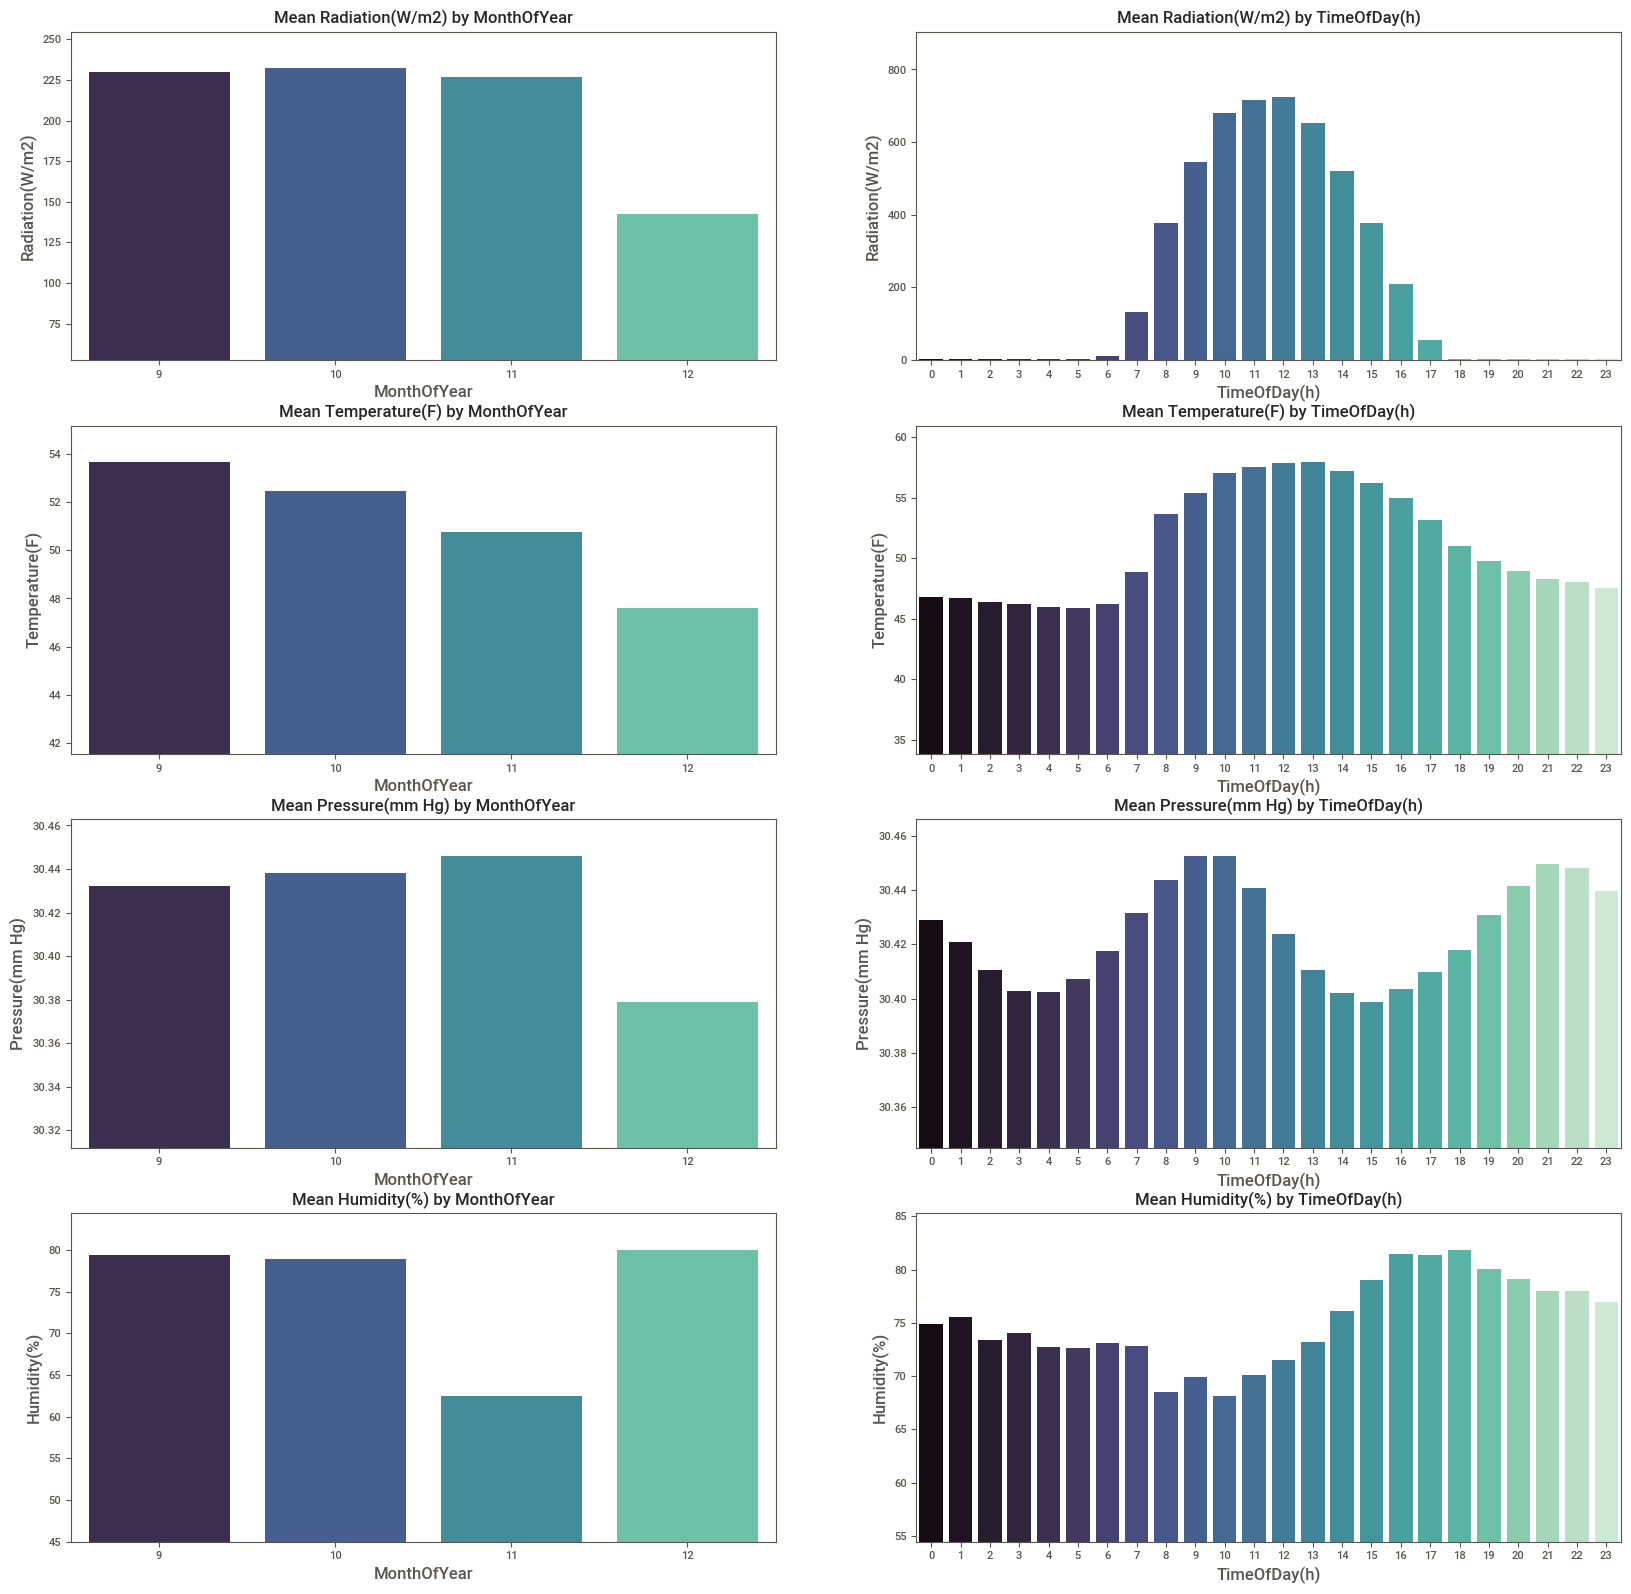

In [35]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for j, timeunit in enumerate(['MonthOfYear', 'TimeOfDay(h)']):
    grouped_data=solar_train.groupby(timeunit).mean().reset_index()
    palette = sns.color_palette("mako",len(grouped_data))
    for i, col in enumerate(['Radiation(W/m2)', 'Temperature(F)', 'Pressure(mm Hg)', 'Humidity(%)']):
        sns.barplot(data=grouped_data, x=timeunit, y=col, ax=ax[i][j], palette=palette)
        ax[i][j].set_title(f'Mean {col} by {timeunit}', fontsize=12)
        range_values = grouped_data[col].max() - grouped_data[col].min()
        ax[i][j].set_ylim(max(grouped_data[col].min() - range_values, 0), grouped_data[col].max() + 0.25*range_values)
        
        


<AxesSubplot:>

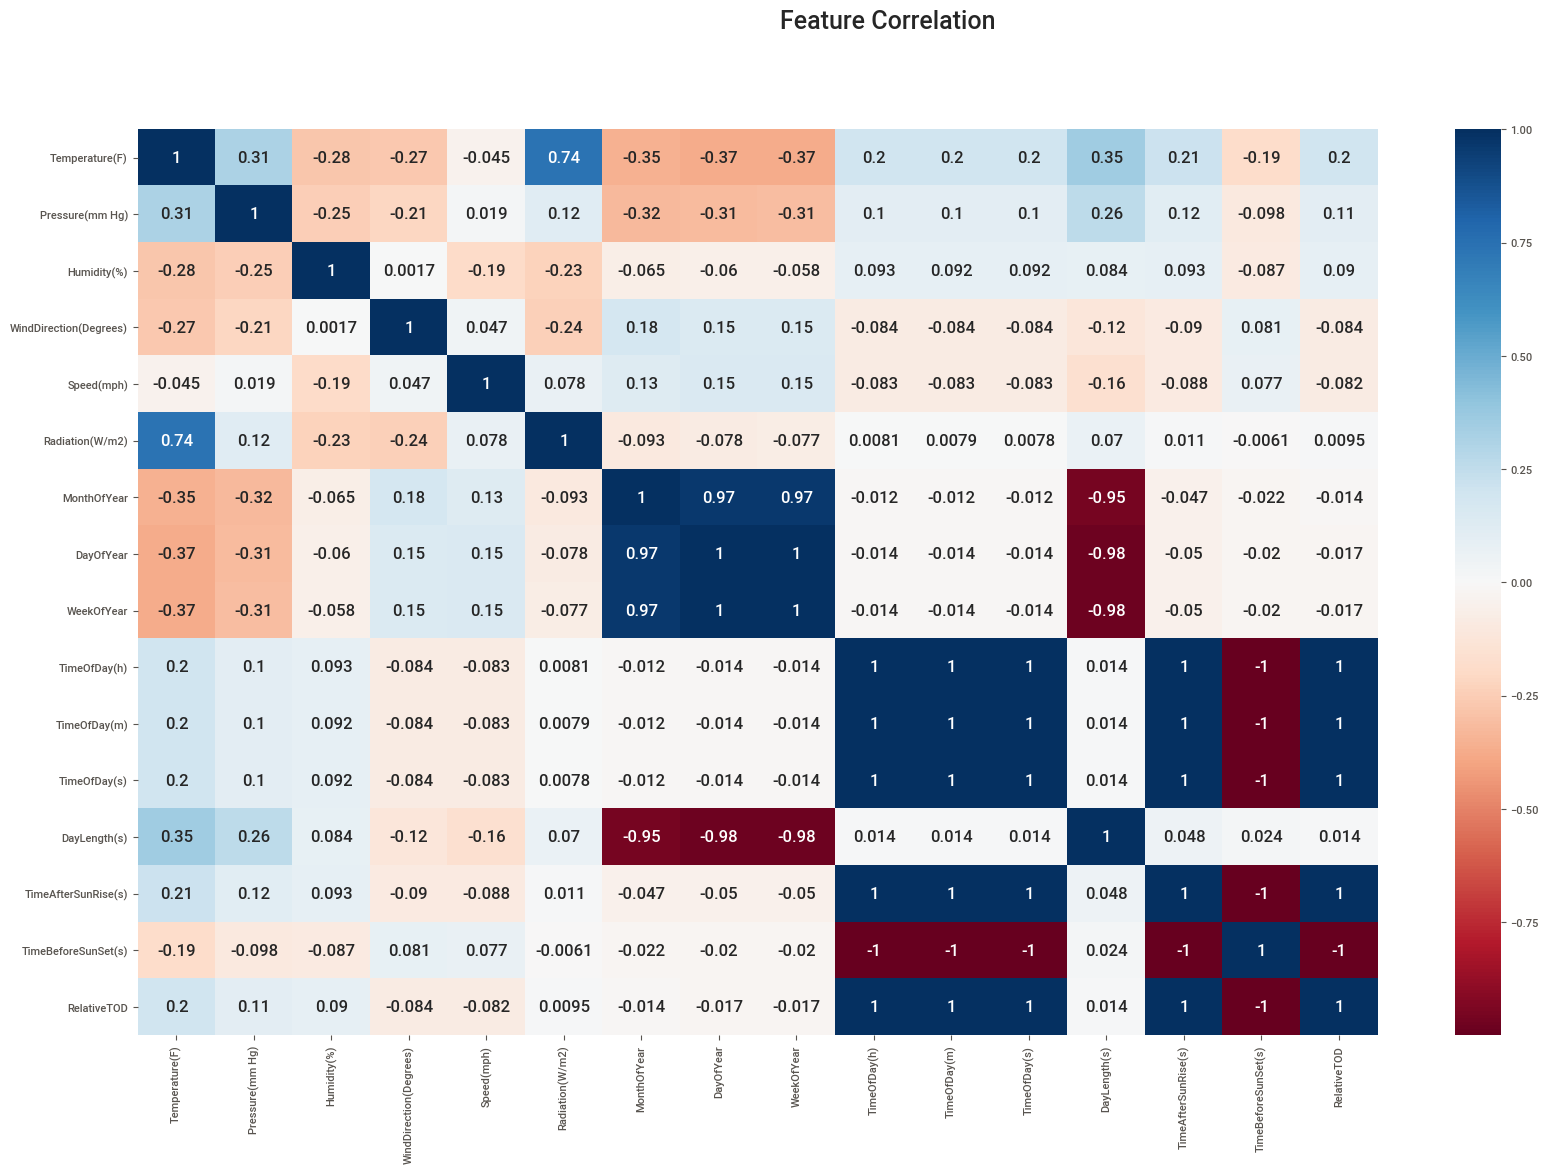

In [36]:
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(solar_train.corr(), annot=True, cmap='RdBu', center=0)

In [37]:
solar_train.columns

Index(['Temperature(F)', 'Pressure(mm Hg)', 'Humidity(%)',
       'WindDirection(Degrees)', 'Speed(mph)', 'Radiation(W/m2)',
       'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'TimeOfDay(h)',
       'TimeOfDay(m)', 'TimeOfDay(s)', 'DayLength(s)', 'TimeAfterSunRise(s)',
       'TimeBeforeSunSet(s)', 'RelativeTOD'],
      dtype='object')

In [38]:
#solar_train.dropna(subset=['', ''],inplace=True)

In [39]:
#16.Prepare x, y variables
features_to_use = [
    'Temperature(F)', 'Pressure(mm Hg)', 'Humidity(%)', 'WindDirection(Degrees)', 'Speed(mph)', 
    'MonthOfYear','DayOfYear', 'RelativeTOD',
]
X = solar_train[features_to_use].values
y = solar_train['Radiation(W/m2)'].values

print(X.shape)

solar_test_X = solar_test1[features_to_use]
solar_test_X.head()

(25856, 8)


Temperature(F)  Pressure(mm Hg)  Humidity(%)  \
Id                                                                            
1970-01-01 00:00:00.000022107              51            30.43          103   
1970-01-01 00:00:00.000003780              51            30.42          103   
1970-01-01 00:00:00.000013651              51            30.42          103   
1970-01-01 00:00:00.000030473              51            30.42          103   
1970-01-01 00:00:00.000009084              51            30.41          103   

                               WindDirection(Degrees)  Speed(mph)  \
Id                                                                  
1970-01-01 00:00:00.000022107                  142.04        7.87   
1970-01-01 00:00:00.000003780                  158.06        4.50   
1970-01-01 00:00:00.000013651                  112.42        4.50   
1970-01-01 00:00:00.000030473                   66.06        5.62   
1970-01-01 00:00:00.000009084                  127.54       12.37   

                               MonthOfYear  DayOfYear  RelativeTOD  
Id                                                                  
1970-01-01 00:00:00.000022107            1          1    -0.488682  
1970-01-01 00:00:00.000003780            1          1    -0.488682  
1970-01-01 00:00:00.000013651            1          1    -0.488682  
1970-01-01 00:00:00.000030473            1          1    -0.488682  
1970-01-01 00:00:00.000009084            1          1    -0.488682

Feature: 0, Score: 44.39389
Feature: 1, Score: -506.16527
Feature: 2, Score: 0.41783
Feature: 3, Score: -0.23065
Feature: 4, Score: 7.65601
Feature: 5, Score: -82.82891
Feature: 6, Score: 4.47529
Feature: 7, Score: -80.08165


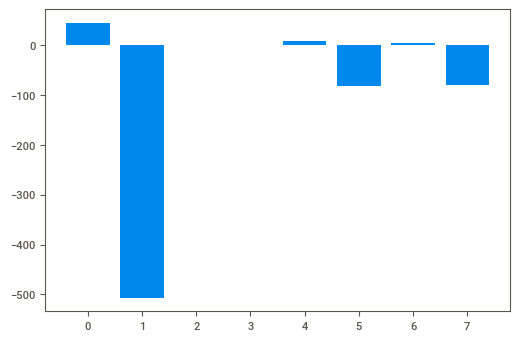

In [40]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model=LinearRegression()
model.fit(X,y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [41]:
features = pd.DataFrame(model.coef_,features_to_use)
features.columns = ['Coeffecient']

features

Coeffecient
Temperature(F)            44.393886
Pressure(mm Hg)         -506.165274
Humidity(%)                0.417834
WindDirection(Degrees)    -0.230655
Speed(mph)                 7.656008
MonthOfYear              -82.828914
DayOfYear                  4.475288
RelativeTOD              -80.081651

In [42]:
stddevs = []
X=pd.DataFrame(X)
for i in X.columns:
    stddev=X[i].std()
    stddevs.append(stddev)
print(stddevs)

[6.195465279959367, 0.05198861623027072, 25.888669473053874, 82.93272560238469, 3.1220113461930707, 1.0937220442942313, 34.6831560362706, 0.6029129534141754]


In [43]:
import numpy as np
features["std"] = np.array(stddevs).reshape(-1,1)
print(features)


                        Coeffecient        std
Temperature(F)            44.393886   6.195465
Pressure(mm Hg)         -506.165274   0.051989
Humidity(%)                0.417834  25.888669
WindDirection(Degrees)    -0.230655  82.932726
Speed(mph)                 7.656008   3.122011
MonthOfYear              -82.828914   1.093722
DayOfYear                  4.475288  34.683156
RelativeTOD              -80.081651   0.602913


In [44]:
features["importance"]=features["Coeffecient"]*features["std"]
features

Coeffecient        std  importance
Temperature(F)            44.393886   6.195465  275.040777
Pressure(mm Hg)         -506.165274   0.051989  -26.314832
Humidity(%)                0.417834  25.888669   10.817166
WindDirection(Degrees)    -0.230655  82.932726  -19.128839
Speed(mph)                 7.656008   3.122011   23.902143
MonthOfYear              -82.828914   1.093722  -90.591809
DayOfYear                  4.475288  34.683156  155.217123
RelativeTOD              -80.081651   0.602913  -48.282265

In [45]:
features["importance_normalized"]=100*features["importance"]/features["importance"].max()
features

Coeffecient        std  importance  \
Temperature(F)            44.393886   6.195465  275.040777   
Pressure(mm Hg)         -506.165274   0.051989  -26.314832   
Humidity(%)                0.417834  25.888669   10.817166   
WindDirection(Degrees)    -0.230655  82.932726  -19.128839   
Speed(mph)                 7.656008   3.122011   23.902143   
MonthOfYear              -82.828914   1.093722  -90.591809   
DayOfYear                  4.475288  34.683156  155.217123   
RelativeTOD              -80.081651   0.602913  -48.282265   

                        importance_normalized  
Temperature(F)                     100.000000  
Pressure(mm Hg)                     -9.567611  
Humidity(%)                          3.932932  
WindDirection(Degrees)              -6.954910  
Speed(mph)                           8.690400  
MonthOfYear                        -32.937592  
DayOfYear                           56.434222  
RelativeTOD                        -17.554584

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.30,random_state=0 )

In [47]:
from sklearn.model_selection import KFold, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.dummy import DummyRegressor
kf = KFold(shuffle=True, random_state=19)
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.model_selection import cross_val_score
 
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

pipeline_lr=Pipeline([ ('scaler1',StandardScaler()), ('Sel1',SelectKBest(score_func=f_regression, k=8)), ('lr_regressor',LinearRegression())])
pipeline_rfc=Pipeline([('scaler2',StandardScaler()),('Sel2',SelectKBest(score_func=f_regression, k=8)),
                     ('RFC_regressor',RandomForestRegressor(n_estimators=100))])
pipeline_dt = Pipeline([('scaler3', StandardScaler()),('Sel3',SelectKBest(score_func=f_regression, k=8)),
                      ('DT_regressor', DecisionTreeRegressor(splitter='best'))])

pipeline_Ada = Pipeline([('scaler4',MinMaxScaler()),('Sel4',SelectKBest(score_func=f_regression, k=8)),
                     ('Adaboost_regressor',AdaBoostRegressor(random_state=0, n_estimators=100,learning_rate=0.0001))])
pipeline_GB =Pipeline([('scaler5', StandardScaler()),('Sel5',SelectKBest(score_func=f_regression, k=8)),('GradientBoosting', GradientBoostingRegressor(random_state=0))])
pipeline_KNN =Pipeline([('scaler6', StandardScaler()),('Sel6',SelectKBest(score_func=f_regression, k=8)),('KNN', KNeighborsRegressor(n_neighbors=6, weights='distance'))])
pipelines = [pipeline_lr, pipeline_rfc, pipeline_dt,pipeline_Ada,pipeline_GB,pipeline_KNN]
pipe_dict = {0: 'Linear Regression', 1: 'Random Forest', 2: 'Decision Tree',3:'AdaBoost Regression',4:'Gradient Boost',5:'KNN'}


performance = {'rmse':[], '100* r2':[], 'mae':[]}
for pipe in pipelines:
    scores = []
    rmse = []
    mae = []
    pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    scores.append(100*model.score(X_val, y_val))
    rmse.append(np.sqrt(mean_squared_error(y_val, model.predict(X_val))))
    mae.append(np.sqrt(mean_squared_error(y_val, model.predict(X_val))))
     
    performance['100* r2'].append(np.mean(scores))
    performance['rmse'].append(np.mean(rmse))
    performance['mae'].append(np.mean(mae))


In [49]:
import plotly.express as px
fig = px.bar(pd.DataFrame(performance, index=pipe_dict.values()), barmode='group', title='Model Comparison')
fig.show()

# HYPERPARAMETER TUNING

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV 
import time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore") 
# Creating a parameter grid for Decision Tree and KNN
# Hyper parameters range intialization for tuning DT

param_grid_DT={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# Define our CNN hyperparameters

param_grid_knn = {'n_neighbors': list(range(1, 30)),
                 'weights': ['uniform','distance']}

# Putting the parameters in a list
param_grid = [param_grid_DT, param_grid_knn]

i = 0

# Creating lists to store scores, models and parameters
best_scores = []
best_models = []
best_params = []
# Instantiating models
Regressors = [DecisionTreeRegressor(random_state=42), KNeighborsRegressor(n_jobs=-1)]

for Reg in Regressors:
  # Extracting model name
  model_name = type(Reg).__name__

  # Applying GridSearchCV on the model
  cv = GridSearchCV(estimator=Reg, param_grid=param_grid[i], scoring='r2', cv= 3)
  
  # Calculating start time
  start_time = time.time()

  # Fitting the model in train set
  cv.fit(X_train, y_train)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Append best score, parameters and models in lists
  best_scores.append(cv.best_score_)
  best_params.append(cv.best_params_)
  best_models.append(cv.best_estimator_)

  # Print time taken for tuning
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('----------------------------------------\n')
  i += 1




Time taken for tuning DecisionTreeRegressor  is:  849.16 sec
----------------------------------------

Time taken for tuning KNeighborsRegressor  is:  14.77 sec
----------------------------------------



In [51]:
# Get the results
print(cv.best_score_)
print(cv.best_estimator_)
print(cv.best_params_)

0.6873422780684931
KNeighborsRegressor(n_jobs=-1, n_neighbors=6, weights='distance')
{'n_neighbors': 6, 'weights': 'distance'}


In [52]:
#X_test=scaler.transform((X_test))
test_pred = pipeline_KNN.predict(solar_test_X)
test_pred
#test_pred=np.power(test_pred,2)
test_pred_df= pd.DataFrame(test_pred)
def lr():  
    test_pred_df.columns = ["Radiation(W/m2)"]
    head =test_pred_df.head()
    return head
lr()
print(test_pred_df.head())

   Radiation(W/m2)
0         2.428371
1         2.430240
2         2.544855
3         2.283285
4         2.986480


In [53]:
solar_future_pred=pd.concat([solar_test,test_pred_df.set_index(solar_test.index)], axis=1)
solar_future_pred

UNIXTime                    Data      Time  Temperature  Pressure  \
Id                                                                           
22107  1478720107   11/9/2016 12:00:00 AM  09:35:07           59     30.47   
3780   1474063503   9/16/2016 12:00:00 AM  12:05:03           59     30.48   
13651  1476109221  10/10/2016 12:00:00 AM  04:20:21           47     30.39   
30473  1481475056  12/11/2016 12:00:00 AM  06:50:56           45     30.40   
9084   1477493117  10/26/2016 12:00:00 AM  04:45:17           45     30.40   
...           ...                     ...       ...          ...       ...   
23966  1478161518   11/2/2016 12:00:00 AM  22:25:18           46     30.46   
3827   1474048530   9/16/2016 12:00:00 AM  07:55:30           51     30.45   
3350   1474197908   9/18/2016 12:00:00 AM  01:25:08           51     30.46   
29471  1481776204  12/14/2016 12:00:00 AM  18:30:04           47     30.27   
20894  1479084002  11/13/2016 12:00:00 AM  14:40:02           58     30.42   

       Humidity  WindDirection(Degrees)  Speed          TimeSunRise  \
Id                                                                    
22107        44                  312.67   3.37  2016-11-09 06:28:00   
3780         83                   38.01   6.75  2016-09-16 06:10:00   
13651        78                  213.62   5.62  2016-10-10 06:16:00   
30473        98                  176.63   4.50  2016-12-11 06:47:00   
9084         34                  175.89   6.75  2016-10-26 06:21:00   
...         ...                     ...    ...                  ...   
23966        38                  176.09   9.00  2016-11-02 06:24:00   
3827        100                   31.25  13.50  2016-09-16 06:10:00   
3350         89                  147.11   7.87  2016-09-18 06:11:00   
29471        54                  231.71   6.75  2016-12-14 06:49:00   
20894        65                   72.40  10.12  2016-11-13 06:30:00   

                TimeSunSet                 Date  Radiation(W/m2)  
Id                                                                
22107  2016-11-09 17:45:00  2016-11-09 09:35:07         2.428371  
3780   2016-09-16 18:25:00  2016-09-16 12:05:03         2.430240  
13651  2016-10-10 18:03:00  2016-10-10 04:20:21         2.544855  
30473  2016-12-11 17:44:00  2016-12-11 06:50:56         2.283285  
9084   2016-10-26 17:52:00  2016-10-26 04:45:17         2.986480  
...                    ...                  ...              ...  
23966  2016-11-02 17:48:00  2016-11-02 22:25:18         2.718309  
3827   2016-09-16 18:25:00  2016-09-16 07:55:30         3.541332  
3350   2016-09-18 18:23:00  2016-09-18 01:25:08         2.833262  
29471  2016-12-14 17:46:00  2016-12-14 18:30:04         2.718308  
20894  2016-11-13 17:44:00  2016-11-13 14:40:02         2.718310  

[6538 rows x 12 columns]

In [54]:
solar_future_pred.drop(['UNIXTime','Data','Time','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','TimeSunRise','TimeSunSet','Date'], axis=1, inplace=True)
solar_future_pred

Radiation(W/m2)
Id                    
22107         2.428371
3780          2.430240
13651         2.544855
30473         2.283285
9084          2.986480
...                ...
23966         2.718309
3827          3.541332
3350          2.833262
29471         2.718308
20894         2.718310

[6538 rows x 1 columns]

In [55]:
solar_future_pred.to_csv("submission_solar_pred.csv",index=True, header=False)

In [56]:
solar_future_pred.describe()

Radiation(W/m2)
count      6538.000000
mean        131.833616
std         257.547716
min           1.790137
25%           2.506677
50%           2.784854
75%          72.695934
max        1030.894835